In [33]:
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import glob
import os
import numpy as np
import iris.coord_categorisation
import pandas as pd
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

useful functions 

In [34]:

def mask_where_zero(cube):
    cube.data = np.ma.masked_array(cube.data)
    cube.data.fill_value= 9.99e9
    cube.data[np.where(cube.data == 0.0)] = 9.99e9
    cube.data = np.ma.masked_where(cube.data == 9.99e9,cube.data)
    return cube

def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_sum(cube):
#     first_dim = cube.coord(dimensions=1).long_name #latitude
#     second_dim = cube.coord(dimensions=2).long_name #longitude
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    area_avged_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.SUM, weights=grid_areas)
    return area_avged_cube

def area_avg(cube):
#     first_dim = cube.coord(dimensions=1).long_name #latitude
#     second_dim = cube.coord(dimensions=2).long_name #longitude
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    area_avged_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)
    return area_avged_cube

def area_sum2(cube,lon_west,lon_east,lat_south,lat_north):
    cube = extract_region(cube,lon_west,lon_east,lat_south,lat_north)
#     first_dim = cube.coord(dimensions=1).long_name #latitude
#     second_dim = cube.coord(dimensions=2).long_name #longitude
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    area_avged_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.SUM, weights=grid_areas)
    return area_avged_cube

def area_avg2(cube,lon_west,lon_east,lat_south,lat_north):
    cube = extract_region(cube,lon_west,lon_east,lat_south,lat_north)
#     first_dim = cube.coord(dimensions=1).long_name #latitude
#     second_dim = cube.coord(dimensions=2).long_name #longitude
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    area_avged_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)
    return area_avged_cube

def avg_years(cube,start_yr,end_yr):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.where((cube.coord('year').points >= start_yr) & (cube.coord('year').points <= end_yr))
    if len(loc[0]) > 0:
        return cube[loc].collapsed('time', iris.analysis.MEAN)
    else:
        cube=cube.collapsed('time', iris.analysis.MEAN)
        cube.data[:] = np.nan
        return cube

                   
def return_years(cube):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    return cube.coord('year').points





TMM results

In [46]:
glodap_dic_file ='/data/NAS-ph290/ph290/observations/GLODAPv2_Mapped_Climatologies/GLODAPv2.2016b_MappedClimatologies/GLODAPv2.2016b.TCO2.nc'
glodap_talk_file ='/data/NAS-ph290/ph290/observations/GLODAPv2_Mapped_Climatologies/GLODAPv2.2016b_MappedClimatologies/GLODAPv2.2016b.TAlk.nc'
glodap_dic = (iris.load_cube(glodap_dic_file,'moles of dissolved inorganic carbon per unit mass in seawater')/1000.00)*1.026
glodap_talk = (iris.load_cube(glodap_talk_file,'seawater alkalinity expressed as mole equivalent per unit mass')/1000.0)*1.026

glodap_depths = [   0.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,  150.,        200.,  250.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,       1000., 1100., 1200., 1300., 1400., 1500., 1750., 2000., 2500.,       3000., 3500., 4000., 4500., 5000., 5500.]

In [47]:
model_depths = [50, 120, 220, 360, 550, 790, 1080, 1420, 1810, 2250, 2740, 3280, 3870, 4510, 5200]

# directory_deep = '/data/BatCaveNAS/ph290/tmm/paul_deep_dissolution/'
directory_deep = '/data/BatCaveNAS/ph290/tmm/aimee_deep_dissolution/'
directory_deep = '/data/BatCaveNAS/ph290/tmm/aimee_shallow/'
alk_files_deep_aimee = glob.glob(directory_deep+'ALK_*.nc')
dic_files_deep_aimee = glob.glob(directory_deep+'DIC_*.nc')
        
directory_deep = '/data/BatCaveNAS/ph290/tmm/paultest2/'
alk_files_deep = glob.glob(directory_deep+'ALK_*.nc')
dic_files_deep = glob.glob(directory_deep+'DIC_*.nc')

directory_deep2 = '/data/BatCaveNAS/ph290/tmm/paul_test/'
alk_files_deep2 = glob.glob(directory_deep2+'ALK_*.nc')
dic_files_deep2 = glob.glob(directory_deep2+'DIC_*.nc')

directory_shallow ='/data/BatCaveNAS/ph290/tmm/paul_shallow_dissolution/'
alk_files_shallow = glob.glob(directory_shallow+'ALK_*.nc')
dic_files_shallow = glob.glob(directory_shallow+'DIC_*.nc')

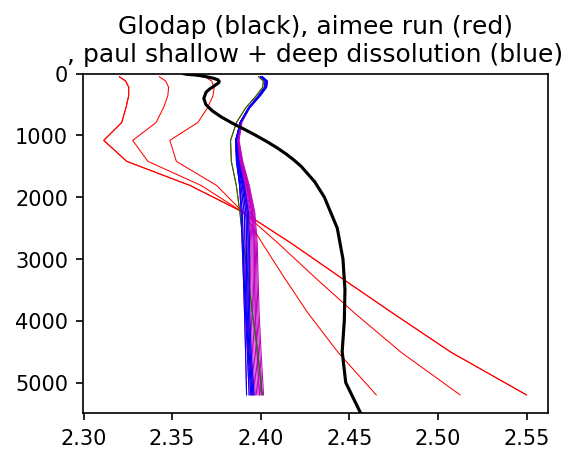

In [49]:
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='none', edgecolor='none')

# for i in range(len(alk_files_deep)):
#     cube = iris.load_cube(alk_files_deep[i])
#     plt.plot(area_avg(cube).data - area_avg(cube).data[0],model_depths,'r',lw=0.5)
    
# for i in range(len(alk_files_shallow)):
#     cube = iris.load_cube(alk_files_shallow[i])
#     plt.plot(area_avg(cube).data - area_avg(cube).data[0],model_depths,'b',lw=0.5)


# plt.plot(area_avg(glodap_talk).data - area_avg(glodap_talk).data[0],glodap_depths,'k')

for i in range(len(alk_files_deep)):
    cube = iris.load_cube(alk_files_deep[i])
    plt.plot(area_avg(cube).data,model_depths,'r',lw=0.5)

for i in range(len(alk_files_deep_aimee)):
    cube = iris.load_cube(alk_files_deep_aimee[i])
    plt.plot(area_avg(cube).data,model_depths,'m',lw=0.5)
    
for i in range(len(alk_files_deep2)):
    cube = iris.load_cube(alk_files_deep2[i])
    plt.plot(area_avg(cube).data,model_depths,'g',lw=0.5)
    
for i in range(len(alk_files_shallow)):
    cube = iris.load_cube(alk_files_shallow[i])
    plt.plot(area_avg(cube).data,model_depths,'b',lw=0.5)


plt.plot(area_avg(glodap_talk).data,glodap_depths,'k')

plt.title('Glodap (black), aimee run (red)\n, paul shallow + deep dissolution (blue)')

plt.ylim([5500,0])
# plt.xlim([2.3,2.42])

plt.savefig('/home/ph290/Documents/figures/aimee.png')

In [38]:
print cube


ALK / (1)                           (Depth: 15; latitude: 64; longitude: 128)
     Dimension coordinates:
          Depth                           x             -              -
          latitude                        -             x              -
          longitude                       -             -              x


In [39]:
area_avg(glodap_talk)
len(glodap_depths)

33

(5500, 0)

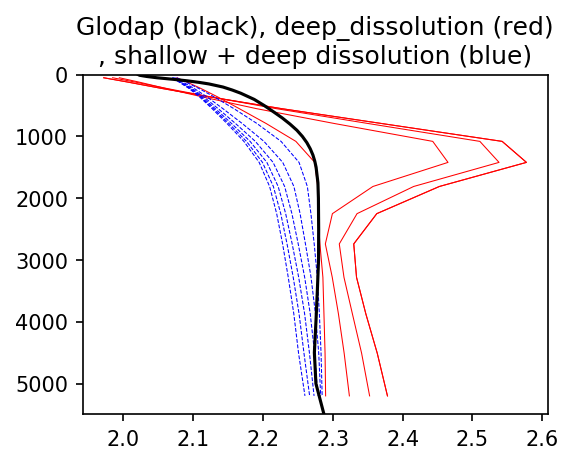

In [40]:

# for i in range(len(alk_files_deep)):
#     cube = iris.load_cube(dic_files_deep[i])
#     qplt.plot(area_avg(cube),'r')
    
# for i in range(len(alk_files_shallow)):
#     cube = iris.load_cube(_files_shallow[i])
#     qplt.plot(area_avg(cube),'b--')

    
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='none', edgecolor='none')

# for i in range(len(dic_files_deep)):
#     cube = iris.load_cube(dic_files_deep[i])
#     plt.plot(area_avg(cube).data - area_avg(cube).data[0],model_depths,'r',lw=0.5)
    
# for i in range(len(dic_files_shallow)):
#     cube = iris.load_cube(dic_files_shallow[i])
#     plt.plot(area_avg(cube).data - area_avg(cube).data[0],model_depths,'b--',lw=0.5)


# plt.plot(area_avg(glodap_dic).data - area_avg(glodap_dic).data[0],glodap_depths,'k')
  
for i in range(len(dic_files_deep)):
    cube = iris.load_cube(dic_files_deep[i])
    plt.plot(area_avg(cube).data,model_depths,'r',lw=0.5)
    
for i in range(len(dic_files_shallow)):
    cube = iris.load_cube(dic_files_shallow[i])
    plt.plot(area_avg(cube).data,model_depths,'b--',lw=0.5)


plt.plot(area_avg(glodap_dic).data,glodap_depths,'k')

plt.title('Glodap (black), deep_dissolution (red)\n, shallow + deep dissolution (blue)')



plt.ylim([5500,0])

in the next experiment, I've simply reduced the production and caco3 production by 1/3rd in the input files